## Aligning Simulated Datasets from MMD-MA

We provide a simulated single-cell RNA-seq dataset to demonstrate the functionality of SCOT aligner. These datasets<br>
-**The first dataset** forms a branching structure, simulating what one might observe in a cell differentiation scenario. <br>
-**The second dataset** is a non-linear projection of the first one, demonstrating SCOT's capability of aligning non-linear datasets.<br>
-**The third dataset** is another non-linear projection of the first dataset, but this time forming a circular frustum, simulating what one might observe when there are cells from different stages of the cell cycle in a dataset.

If you are interested in seeing alignments on **(a)** [larger simulated RNA-seq datasets](), or **(b)** [real datasets with continuous trajectories](), **(c)** [discrete clusters](), **(d)** [unbalanced clusters]() and so on, please visit the other examples on [our documentation website](). If you would like to run these notebooks on your computer, check out [the notebooks in the /replication folder on our GitHub repository]().

### Reading in and Visualizing the Original Datasets

In [1]:
################## Reading in the three datasets #########################
import numpy as np #For reading in files
import matplotlib.pyplot as plt #For plotting
from sklearn.decomposition import PCA #For dimensionality reduction prior to visualization

# The first simulated dataset: Branching Tree, simulating cell differentiation
X1=np.genfromtxt("../data/s1_mapped1.txt", delimiter="\t")
y1=np.genfromtxt("../data/s1_mapped2.txt", delimiter="\t")
print("Shape of the input files are, respectively for domain 1(X) and domain 2 (y) of the first dataset:\n", X1.shape, y1.shape)

# The second simulated dataset: Swiss roll, a non-linear projection of the first dataset
X2=np.genfromtxt("../data/s2_mapped1.txt", delimiter="\t")
y2=np.genfromtxt("../data/s2_mapped2.txt", delimiter="\t")
print("Shape of the input files are, respectively for domain 1(X) and domain 2 (y) of the second dataset:\n", X2.shape, y2.shape)

# The third simulated dataset: Circular frustum, simulating cell cycle
X3=np.genfromtxt("../data/s3_mapped1.txt", delimiter="\t")
y3=np.genfromtxt("../data/s3_mapped2.txt", delimiter="\t")
print("Shape of the input files are, respectively for domain 1(X) and domain 2 (y) of the third dataset:\n", X3.shape, y3.shape)

Shape of the input files are, respectively for domain 1(X) and domain 2 (y) of the first dataset:
 (300, 2000) (300, 1000)
Shape of the input files are, respectively for domain 1(X) and domain 2 (y) of the second dataset:
 (300, 2000) (300, 1000)
Shape of the input files are, respectively for domain 1(X) and domain 2 (y) of the third dataset:
 (300, 2000) (300, 1000)


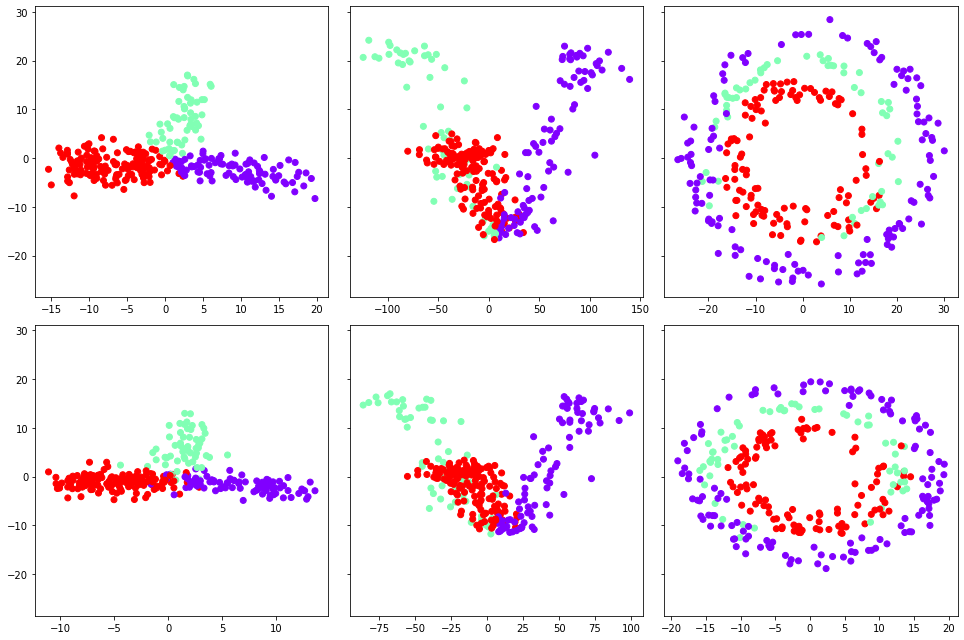

In [9]:
################## Visualizing the original datasets ########################
### Performing dimension reduction with PCA purely for visualization purposes:
pca=PCA(n_components=2) #initializing PCA
X1pca= pca.fit_transform(X1); y1pca=pca.fit_transform(y1) 
X2pca= pca.fit_transform(X2); y2pca=pca.fit_transform(y2)
X3pca= pca.fit_transform(X3); y3pca=pca.fit_transform(y3)

### Reading in cell type label information for visualization:
X1lab=np.genfromtxt("../data/s1_type1.txt", delimiter="\t"); y1lab=np.genfromtxt("../data/s1_type2.txt", delimiter="\t")
X2lab=np.genfromtxt("../data/s2_type1.txt", delimiter="\t"); y2lab=np.genfromtxt("../data/s2_type2.txt", delimiter="\t")
X3lab=np.genfromtxt("../data/s3_type1.txt", delimiter="\t"); y3lab=np.genfromtxt("../data/s3_type2.txt", delimiter="\t")

### Plotting the first two principal components of the original datasets
fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(13.5, 9), tight_layout=True, sharey=True)

ax1[0].scatter(X1pca[:,0], X1pca[:,1], c=X1lab, cmap="rainbow")
ax1[1].scatter(X2pca[:,0], X2pca[:,1], c=X2lab, cmap="rainbow")
ax1[2].scatter(X3pca[:,0], X3pca[:,1], c=X3lab, cmap="rainbow")
ax2[0].scatter(y1pca[:,0], y1pca[:,1], c=y1lab, cmap="rainbow")
ax2[1].scatter(y2pca[:,0], y2pca[:,1], c=y2lab, cmap="rainbow")
ax2[2].scatter(y3pca[:,0], y3pca[:,1], c=y3lab, cmap="rainbow")
plt.show()

### Aligning Datasets with SCOT

In [ ]:
from scot import SCOT

sc1=SCOT(X1, y1)
sc1.align()

sc2=SCOT(X2, y2)
sc1.align()

sc2=SCOT(X3, y3)
sc1.align()

### Visualizing the Aligned Datasets

### Evaluating Alignment Quality